In [134]:
import sqlite3
import pandas as pd
import os

In [135]:
sql_path = "../data/sql/"
ml_path = os.path.join(sql_path, "ml.sqlite")
ml_conn = sqlite3.connect(ml_path)

In [136]:
tables = ml_conn.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
print(tables)

[('links',), ('tags',), ('ratings',), ('movies',)]


In [137]:
# no. of rows in each table
for table in tables:
    count = ml_conn.execute(f"SELECT COUNT(*) FROM {table[0]}").fetchall()[0][0]
    print(f"{count} rows in {table[0]}")

9742 rows in links
3683 rows in tags
100836 rows in ratings
9742 rows in movies


In [138]:
# colums of each table
for table in tables:
    df = pd.read_sql(f"SELECT * FROM {table[0]} LIMIT 1", ml_conn)
    print(f"{table[0]} has columns: {df.columns.tolist()}")

links has columns: ['movieId', 'imdbId', 'tmdbId']
tags has columns: ['userId', 'movieId', 'tag', 'timestamp']
ratings has columns: ['userId', 'movieId', 'rating', 'timestamp']
movies has columns: ['movieId', 'title', 'genres']


In [139]:
# no. of movies, people, ratings
numUsers = ml_conn.execute("SELECT COUNT(DISTINCT userID) FROM ratings").fetchall()[0][0]
numMovies = ml_conn.execute("SELECT COUNT(DISTINCT movieID) FROM ratings").fetchall()[0][0]
numRatings = ml_conn.execute("SELECT COUNT(*) FROM ratings").fetchall()[0][0]
print(f"{numUsers} users and {numMovies} movies and {numRatings} ratings.")

610 users and 9724 movies and 100836 ratings.


array([[<Axes: title={'center': 'rating'}>]], dtype=object)

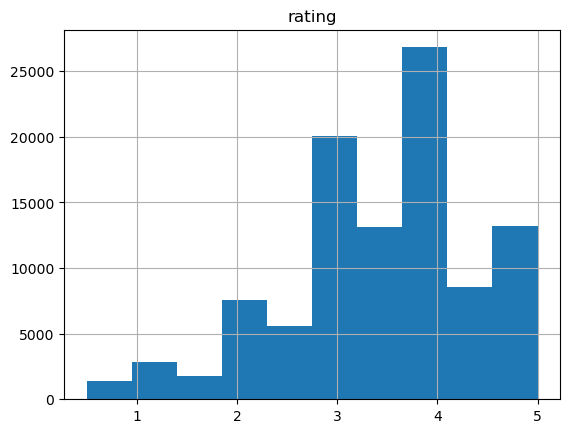

In [188]:
# rating distro
df = pd.read_sql(f"SELECT rating FROM ratings", ml_conn)
df.hist()

In [141]:
# genre freq.
df = pd.read_sql(f"SELECT genres FROM movies", ml_conn)
print(df['genres'].str.split('|').explode().value_counts())

genres
Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
Name: count, dtype: int64


In [185]:
# Top rated and ranked movies
df = pd.read_sql("SELECT m.title, COUNT(r.rating) AS num_ratings, ROUND(AVG(r.rating),2) as avg_ratings FROM ratings r JOIN movies m ON r.movieId=m.movieId GROUP BY m.title HAVING num_ratings > 100 ORDER BY avg_ratings DESC LIMIT 10", ml_conn)
print("Top rated")
print(df)

Top rated
                                       title  num_ratings  avg_ratings
0           Shawshank Redemption, The (1994)          317         4.43
1                      Godfather, The (1972)          192         4.29
2                          Fight Club (1999)          218         4.27
3             Godfather: Part II, The (1974)          129         4.26
4                          Goodfellas (1990)          126         4.25
5                       Departed, The (2006)          107         4.25
6                 Usual Suspects, The (1995)          204         4.24
7                    Dark Knight, The (2008)          149         4.24
8  Star Wars: Episode IV - A New Hope (1977)          251         4.23
9                 Princess Bride, The (1987)          142         4.23


In [186]:
df = pd.read_sql("SELECT m.title, COUNT(r.rating) AS num_ratings, ROUND(AVG(r.rating),2) as avg_ratings FROM ratings r JOIN movies m ON r.movieId=m.movieId GROUP BY m.title ORDER BY num_ratings DESC LIMIT 10", ml_conn)
print("Most rated")
print(df)

Most rated
                                       title  num_ratings  avg_ratings
0                        Forrest Gump (1994)          329         4.16
1           Shawshank Redemption, The (1994)          317         4.43
2                        Pulp Fiction (1994)          307         4.20
3           Silence of the Lambs, The (1991)          279         4.16
4                         Matrix, The (1999)          278         4.19
5  Star Wars: Episode IV - A New Hope (1977)          251         4.23
6                       Jurassic Park (1993)          238         3.75
7                          Braveheart (1995)          237         4.03
8          Terminator 2: Judgment Day (1991)          224         3.97
9                    Schindler's List (1993)          220         4.22
